# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos:   <br>
Url: https://github.com/.../03MAIR---Algoritmos-de-Optimizacion---2019/tree/master/SEMINARIO<br>
Problema:
> 1. Sesiones de doblaje <br>
>2. Organizar los horarios de partidos de La Liga<br>
>3. Combinar cifras y operaciones

Descripción del problema:(copiar enunciado)

**Combinar cifras y operaciones** <br>
- El problema consiste en analizar el siguiente problema y diseñar un algoritmo que lo resuelva.
- Disponemos de las 9 cifras del 1 al 9 (excluimos el cero) y de los 4 signos básicos de las
operaciones fundamentales: suma(+), resta(-), multiplicación(*) y división(/)
- Debemos combinarlos alternativamente sin repetir ninguno de ellos para obtener una
cantidad dada. Un ejemplo sería para obtener el 4:

```
  4+2-6/3*1 = 4
```

(*) La respuesta es obligatoria





                                        

In [21]:
from itertools import permutations

def evaluate_expression(numbers, operators):
    """
    Construye una expresión matemática con los números y operadores dados y evalúa el resultado usando eval.
    """
    expression = "".join(str(numbers[i]) + operators[i] for i in range(len(operators))) + str(numbers[-1])
    try:
        result = eval(expression)
    except ZeroDivisionError:
        return None, None  # Evita divisiones por cero
    return result, expression

def find_expression(target):
    digits = list(range(1, 10))
    operators = ['+', '-', '*', '/']

    for num_perm in permutations(digits, 5):  # Elegimos solo 5 números sin repetir
        for op_perm in permutations(operators, 4):  # Elegimos 4 operadores sin repetir
            result, expression = evaluate_expression(num_perm, op_perm)
            if result is not None and result == target:
                return expression

    return "No solution found"

# Ejemplo de uso
target_number = 1
solution = find_expression(target_number)
if solution == "No solution found":
    print(f"No se encontró una expresión para {target_number}")
else:
  print(f"Para el número {target_number}")
  print("La solución es:", solution)
  print("Evaluando el resultado:")
  print(f"    {solution} = {eval(solution)}")

Para el número 1
La solución es: 1+2-3*4/6
Evaluando el resultado:
    1+2-3*4/6 = 1.0


### Debe analizarse el problema para encontrar todos los valores enteros posibles planteando las siguientes cuestiones:
- ¿Qué valor máximo y mínimo se pueden obtener según las condiciones del problema?
- ¿Es posible encontrar todos los valores enteros posibles entre dicho mínimo y máximo ?

Minimum value: -69
Maximum value: 77
All integers in range present: True


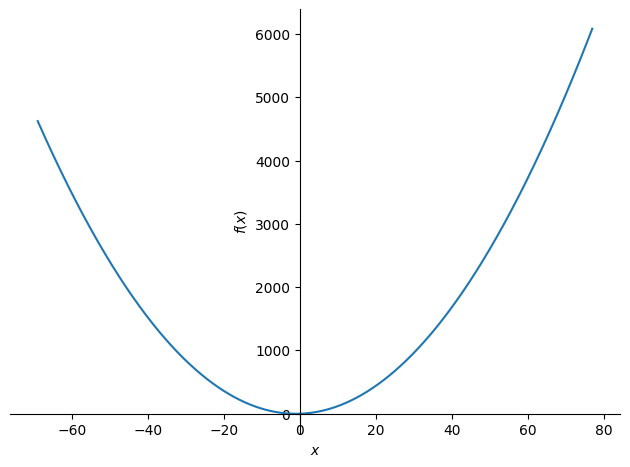

In [25]:
def find_valid_solutions():
    """
    Encuentra todas las soluciones posibles dentro del dominio de valores enteros.
    """
    digits = list(range(1, 10))
    operators = ['+', '-', '*', '/']
    results = {}

    for num_perm in permutations(digits, 5):  # Elegimos solo 5 números sin repetir
        for op_perm in permutations(operators, 4):  # Elegimos 4 operadores sin repetir
            result, expression = evaluate_expression(num_perm, op_perm)
            if result is not None and result == int(result):  # Solo enteros
                results[int(result)] = expression

    return results

# Obtener el dominio de soluciones válidas
valid_solutions = find_valid_solutions()
min_value = min(valid_solutions.keys())
max_value = max(valid_solutions.keys())
all_integers_present = set(range(min_value, max_value + 1)).issubset(valid_solutions.keys())

print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")
print(f"All integers in range present: {all_integers_present}")

from sympy import symbols, Add, Mul, Rational
from sympy.plotting import plot
# Definir la función objetivo en términos simbólicos
x = symbols('x')
f = Add(x**2, Mul(2, x))  # Ejemplo simbólico representativo

# Graficar en 2D
plot(f, (x, min_value, max_value))



### (*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>

- Se seleccionan **9 números sin repetir** del conjunto \( \{1,2,3,4,5,6,7,8,9\} \).
- Se seleccionan **4 operadores sin repetir** de \( \{+, -, *, /\} \).

Las cantidades de permutaciones posibles son:

- **Permutaciones de 9 números elegidos:**  
  $
  P(9) = 9! = 362880
  $
- **Permutaciones de 4 operadores elegidos de 4:**  
  $
  P(4,4) = 4! = 24
  $
- **Cantidad total de posibilidades:**
  362880 * 24 = 8709120

### ¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.

- Se seleccionan **5 números sin repetir** del conjunto \( \{1,2,3,4,5,6,7,8,9\} \).
- Se seleccionan **4 operadores sin repetir** de \( \{+, -, *, /\} \).

Las cantidades de permutaciones posibles son:

- **Permutaciones de 5 números elegidos de 9:**  
  $
  P(9,5) = \frac{9!}{(9-5)!} = \frac{9!}{4!} = \frac{362880}{24} = 15120
  $
- **Permutaciones de 4 operadores elegidos de 4:**  
  $
  P(4,4) = 4! = 24
  $
- **Cantidad total de posibilidades:**
  15120 * 24 = 362880

Respuesta

Modelo para el espacio de soluciones<br>
# (*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)

## Estructura de Datos Adecuada
La mejor estructura de datos para almacenar las soluciones en este problema es un diccionario (dict) en Python. La razón principal es que:

1. Cada expresión matemática genera un valor único (clave-valor)

- La clave del diccionario será el resultado numérico obtenido.
- El valor almacenado será la expresión matemática que lo generó.

2. Evita duplicados y permite acceso rápido

- Si usamos un set, solo almacenaríamos los valores únicos obtenidos sin rastrear cómo se generaron.
- Usar una lista sería ineficiente, ya que la búsqueda de valores sería $O(n)$ en el peor caso.
- Un diccionario nos permite acceso en $O(1)$ a cualquier resultado específico, facilitando la verificación de la continuidad del dominio de soluciones.

Respuesta

Según el modelo para el espacio de soluciones<br>
# (*)¿Cual es la función objetivo?

## Función Objetivo

La función objetivo se define como una expresión matemática construida a partir de los números del 1 al 9 (sin repetir) y los operadores básicos de suma, resta, multiplicación y división (también sin repetir). Se busca obtener una cantidad dada combinando estos elementos de manera alternada.

### **Expresión General**
Dado un conjunto de cinco números distintos $( a, b, c, d, e )$ y cuatro operadores distintos $( op_1, op_2, op_3, op_4 )$, la función objetivo se expresa como:

\begin{align}
f(a, b, c, d, e) = a \, op_1 \, b \, op_2 \, c \, op_3 \, d \, op_4 \, e
\end{align}


donde:

- $( a, b, c, d, e )$ son elementos del conjunto $\{ 1, 2, 3, 4, 5, 6, 7, 8, 9 \}$ sin repetir.
- $( op_1, op_2, op_3, op_4 )$ son operadores elegidos de $\{ +, -, *, / \}$ sin repetir.
- La evaluación de la expresión sigue la jerarquía estándar de operaciones matemáticas.

### **Ejemplo de Evaluación**
Para obtener un resultado objetivo, como $ f(a, b, c, d, e) = 4 $, una posible combinación sería:

\begin{align}
        4 + 2 - 6 \div 3 \times 1 = 4
\end{align}


Este problema genera un conjunto de valores posibles, cuyo dominio y rango dependen de las combinaciones generadas bajo estas restricciones.


# (*)¿Es un problema de maximización o minimización?

El problema propuesto puede interpretarse como un problema de optimización, ya que buscamos encontrar el rango de valores enteros posibles que se pueden obtener mediante la combinación de los números del 1 al 9 con las operaciones básicas.

Sin embargo, no se trata de una típica maximización o minimización en términos de optimización clásica, sino de exploración de dominio. Aun así, podemos analizarlo desde esta perspectiva:

- Si el objetivo fuera encontrar el mayor valor posible que se puede obtener con las restricciones dadas, entonces sería un problema de maximización.
- Si el objetivo fuera encontrar el menor valor posible, entonces sería un problema de minimización.

Dado que el problema nos pide encontrar todos los valores posibles dentro de un dominio, podemos decir que involucra tanto la maximización como la minimización, ya que al final obtenemos el valor máximo y el valor mínimo posible de las combinaciones válidas.

### Conclusión
El problema no es estrictamente de maximización o minimización en el sentido clásico, pero se puede abordar como un problema de exploración de límites, donde encontramos tanto el mínimo como el máximo valor alcanzable dentro de las restricciones impuestas

Respuesta

Diseña un algoritmo para resolver el problema por fuerza bruta

Respuesta

In [26]:
def brute_force_solution(target):
    """
    Algoritmo de fuerza bruta para encontrar una expresión que evalúe al número objetivo.
    """
    digits = list(range(1, 10))
    operators = ['+', '-', '*', '/']

    for num_perm in permutations(digits, 5):  # Tomamos 5 números sin repetir
        for op_perm in permutations(operators, 4):  # Tomamos 4 operadores sin repetir
            result, expression = evaluate_expression(num_perm, op_perm)
            if result is not None and result == target:
                return expression

    return "No solution found"


# Ejemplo de búsqueda de una solución por fuerza bruta
target_number = 4
solution = brute_force_solution(target_number)
if solution == "No solution found":
    print(f"No se encontró una expresión para {target_number}")
else:
    print(f"Para el número {target_number}")
    print("La solución es:", solution)
    print("Evaluando el resultado:")
    print(f"    {solution} = {eval(solution)}")

Para el número 4
La solución es: 1-2*3/6+4
Evaluando el resultado:
    1-2*3/6+4 = 4.0


Calcula la complejidad del algoritmo por fuerza bruta

Respuesta

# **Cálculo de la Complejidad del Algoritmo de Fuerza Bruta**

El algoritmo se basa en generar todas las combinaciones posibles de números y operadores sin repetir, evaluar cada una y comprobar si el resultado coincide con el valor objetivo.

## **1. Generación de Permutaciones**
- Se seleccionan **5 números sin repetir** del conjunto \( \{1,2,3,4,5,6,7,8,9\} \).
- Se seleccionan **4 operadores sin repetir** de \( \{+, -, *, /\} \).

Las cantidades de permutaciones posibles son:

- **Permutaciones de 5 números elegidos de 9:**  
  $
  P(9,5) = \frac{9!}{(9-5)!} = \frac{9!}{4!} = \frac{362880}{24} = 15120
  $
- **Permutaciones de 4 operadores elegidos de 4:**  
  $
  P(4,4) = 4! = 24
  $

## **2. Evaluación de Expresiones**
Cada combinación de números y operadores genera **una única expresión** que se evalúa usando `eval()`. En el peor caso, el algoritmo revisa **todas** las combinaciones posibles.

## **3. Complejidad Total**
Multiplicamos las combinaciones de números por las de operadores:

$
O(P(9,5) \times P(4,4)) = O(15120 \times 24) = O(362880)
$

Es decir, el **peor caso** del algoritmo tiene una **complejidad factorial** aproximada a:

$
O(9!)
$

Dado que **\( 9! = 362880 \)**, el algoritmo tiene una **complejidad exponencial alta** debido a la exploración exhaustiva del espacio de soluciones.

---

## **Conclusión**
- **La complejidad es $ O(9!) $ (factorial), lo que lo hace computacionalmente costoso.**
- **Este tipo de problema es ineficiente para grandes conjuntos de datos**, aunque factible para este caso (dado que \( 9! \) sigue siendo manejable en computadoras modernas).
- **Se podría optimizar el algoritmo** utilizando **poda de búsqueda** (por ejemplo, descartando combinaciones inválidas tempranamente o utilizando técnicas de backtracking).



(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Respuesta

In [48]:
from itertools import permutations
from sympy import symbols, Add, Mul, Rational

def evaluate_expression(numbers, operators):
    """
    Construye una expresión matemática con los números y operadores dados y evalúa el resultado usando eval.
    """
    expression = "".join(f"{numbers[i]}{operators[i]}" for i in range(len(operators))) + str(numbers[-1])
    try:
        result = eval(expression)
    except ZeroDivisionError:
        return None, None  # Evita divisiones por cero
    return result, expression

def backtracking_solution(target, numbers, operators, index=0, current_value=None, current_expression="", used_ops=set()):
    """
    Algoritmo optimizado usando backtracking con poda, asegurando el uso de 5 números y 4 operadores sin repetir.
    """
    if index == 5:  # Se deben usar los 5 números y 4 operadores
        if current_value == target:
            return current_expression
        return None

    if current_value is None:
        return backtracking_solution(target, numbers, operators, index + 1, numbers[0], str(numbers[0]), used_ops)

    if index < 5:
        for op in operators:
            if op in used_ops:
                continue  # Evita repetir operadores

            if op == '/' and numbers[index] == 0:
                continue  # Evita la división por cero

            new_value = eval(f"{current_value}{op}{numbers[index]}")
            new_expression = f"({current_expression}{op}{numbers[index]})"

            if abs(new_value) > abs(target) * 2:  # Poda: evita valores extremos
                continue

            result = backtracking_solution(target, numbers, operators, index + 1, new_value, new_expression, used_ops | {op})
            if result:
                return result

    return None

def find_optimized_expression(target):
    """
    Encuentra una expresión válida usando el algoritmo optimizado con backtracking y poda.
    """
    digits = list(range(1, 10))
    operators = ['+', '-', '*', '/']

    for num_perm in permutations(digits, 5):  # Genera combinaciones de 5 números sin repetir
        for op_perm in permutations(operators, 4):  # Genera combinaciones de 4 operadores sin repetir
            result = backtracking_solution(target, num_perm, op_perm)
            if result:
                return result

    return "No solution found"

# Ejemplo de búsqueda de una solución optimizada
target_number = 79
solution = find_optimized_expression(target_number)
if solution == "No solution found":
    print(f"No se encontró una expresión para {target_number}")
else:
    print(f"Para el número {target_number}")
    print("La solución optimizada es:", solution)
    print("Evaluando el resultado:")
    print(f"    {solution} = {eval(solution)}")

# Definir la función objetivo en términos simbólicos
x = symbols('x')
f = Add(x**2, Mul(2, x))  # Ejemplo simbólico representativo

Para el número 79
La solución optimizada es: ((((3/1)+6)*9)-2)
Evaluando el resultado:
    ((((3/1)+6)*9)-2) = 79.0


(*)Calcula la complejidad del algoritmo

Respuesta

# **Cálculo de la Complejidad del Algoritmo**

El algoritmo optimizado utiliza **backtracking con poda**, lo que mejora significativamente la complejidad en comparación con la fuerza bruta. Analicemos cada parte:

## **1️⃣ Generación de Permutaciones**
- Se generan todas las combinaciones de **5 números sin repetir** del conjunto $ \{1,2,3,4,5,6,7,8,9\} $:

  $
  P(9,5) = \frac{9!}{(9-5)!} = \frac{9!}{4!} = \frac{362880}{24} = 15120
  $

- Se generan todas las combinaciones de **4 operadores sin repetir** del conjunto $ \{+, -, *, /\} $:

  $
  P(4,4) = 4! = 24
  $

Entonces, el número total de combinaciones iniciales es:

$
O(15120 \times 24) = O(362880)
$

Sin embargo, **no evaluamos todas** debido al **backtracking con poda**.


## **2️⃣ Backtracking con Poda**
En cada combinación de números y operadores:
- Se construye una expresión usando **5 números y 4 operadores**.
- Se evalúa progresivamente la expresión para **descartar caminos no prometedores**.
- Se usa **poda** para evitar valores excesivos y combinaciones irrelevantes.

Dado que el backtracking explora solo caminos válidos y corta ramas innecesarias, la complejidad **se reduce significativamente**.

En lugar de evaluar todas las $O(9!)$ combinaciones, la poda limita el crecimiento exponencial. Podemos aproximar la nueva complejidad como:

$
O(k^n)
$

donde $k$ es la cantidad promedio de decisiones viables en cada paso y $n = 5$.

En la práctica, esta reducción hace que el algoritmo sea **mucho más rápido que la fuerza bruta**, aunque sigue siendo **exponencial en el peor caso**.


## **Conclusión**
- **El uso de backtracking y poda reduce la cantidad de combinaciones exploradas, lo que mejora la eficiencia.**
- **La nueva complejidad es exponencial, pero significativamente menor que $O(9!)$.**
- **El algoritmo evita cálculos innecesarios y encuentra soluciones de manera más eficiente.**

Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Respuesta

In [49]:
import random

def generate_random_targets(n):
    """
    Genera un conjunto de números aleatorios como objetivo.
    """
    return [random.randint(-50, 50) for _ in range(n)]

# Generar datos de prueba aleatorios
test_targets = generate_random_targets(5)
print("Datos de prueba generados:", test_targets)

Datos de prueba generados: [42, -4, -10, 33, -46]


Aplica el algoritmo al juego de datos generado

Respuesta

In [50]:
# Aplicar el algoritmo a los datos generados
for target in test_targets:
    solution = find_optimized_expression(target)
    if solution == "No solution found":
        print(f"No se encontró una expresión para {target}")
    else:
        print(f"Para el número {target}")
        print("La solución optimizada es:", solution)
        print("Evaluando el resultado:")
        print(f"    {solution} = {eval(solution)}")

# Definir la función objetivo en términos simbólicos
x = symbols('x')
f = Add(x**2, Mul(2, x))  # Ejemplo simbólico representativo

Para el número 42
La solución optimizada es: ((((1-2)/3)+5)*9)
Evaluando el resultado:
    ((((1-2)/3)+5)*9) = 42.0
Para el número -4
La solución optimizada es: ((((1+2)/3)*4)-8)
Evaluando el resultado:
    ((((1+2)/3)*4)-8) = -4.0
Para el número -10
La solución optimizada es: ((((1/2)+3)-6)*4)
Evaluando el resultado:
    ((((1/2)+3)-6)*4) = -10.0
Para el número 33
La solución optimizada es: ((((1-2)/3)+4)*9)
Evaluando el resultado:
    ((((1-2)/3)+4)*9) = 33.0
Para el número -46
La solución optimizada es: ((((1/2)-7)*8)+6)
Evaluando el resultado:
    ((((1/2)-7)*8)+6) = -46.0


Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Respuesta

Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Respuesta